Accuracy: 52.75%

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.82        48
           1       0.19      0.18      0.18        17
           2       0.12      0.08      0.10        12
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         4

    accuracy                           0.53        91
   macro avg       0.21      0.24      0.22        91
weighted avg       0.44      0.53      0.48        91



C:\Users\Almaas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Almaas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Almaas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


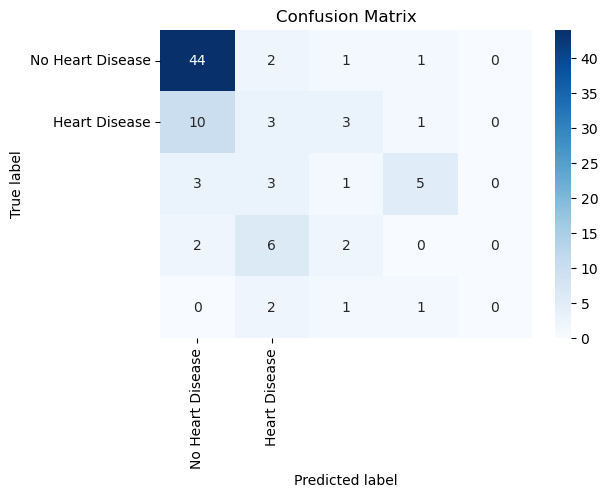

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset (example: heart disease dataset)
# You can replace this with the correct path to the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load the dataset into a pandas dataframe
df = pd.read_csv(url, names=columns, na_values="?")

# Step 2: Data Preprocessing
# Handle missing values (example: replace NaN with the median value)
df.fillna(df.median(), inplace=True)

# Convert categorical variables to numerical ones (for example 'cp' is chest pain type)
df = pd.get_dummies(df, drop_first=True)

# Step 3: Split the data into features and target variable
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable (0 = no heart disease, 1 = heart disease)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Build the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report for precision, recall, f1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix for deeper insights
cm = confusion_matrix(y_test, y_pred)

# Step 7: Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Heart Disease", "Heart Disease"], yticklabels=["No Heart Disease", "Heart Disease"])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()